<a href="https://colab.research.google.com/github/peisuke/generative_ai_notebooks/blob/main/Vision/13_CartoonSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/CartoonSegmentation/CartoonSegmentation.git

fatal: destination path 'CartoonSegmentation' already exists and is not an empty directory.


In [2]:
%cd CartoonSegmentation

/content/CartoonSegmentation


In [3]:
!pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"
!mim install mmdet
!pip install -r requirements.txt

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
  Cloning https://github.com/lucasb-eyer/pydensecrf.git to /tmp/pip-req-build-7lxpbadb
  Running command git clone --filter=blob:none --quiet https://github.com/lucasb-eyer/pydensecrf.git /tmp/pip-req-build-7lxpbadb
  Resolved https://github.com/lucasb-eyer/pydensecrf.git to commit dd070546eda51e21ab772ee6f14807c7f5b1548b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-req-build-ggrtwrdb
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/panopticapi.git /tmp/pip-req-build-ggrtwrdb
  Resolved https://github.com/cocodataset/panopticapi.git to c

In [4]:
!huggingface-cli lfs-enable-largefiles .
!mkdir models
!git clone https://huggingface.co/dreMaz/AnimeInstanceSegmentation models/AnimeInstanceSegmentation

Local repo set up for largefiles
mkdir: cannot create directory ‘models’: File exists
fatal: destination path 'models/AnimeInstanceSegmentation' already exists and is not an empty directory.


In [5]:
!wget https://huggingface.co/lllyasviel/Annotators/resolve/1e70a29f5d06c27d37988d2c6c43f6fd21fdb2d1/res101.pth \
    -O models/leres/res101.pth

--2024-01-04 09:59:28--  https://huggingface.co/lllyasviel/Annotators/resolve/1e70a29f5d06c27d37988d2c6c43f6fd21fdb2d1/res101.pth
Resolving huggingface.co (huggingface.co)... 3.163.189.90, 3.163.189.114, 3.163.189.74, ...
Connecting to huggingface.co (huggingface.co)|3.163.189.90|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/a2/11/a211ef997fa284ad67caa591ca931692f9a8a018910b18a04d9e6dff396f02e3/1d696b2ef3e8336b057d0c15bc82d2fecef821bfebe5ef9d7671a5ec5dde520b?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27res101.pth%3B+filename%3D%22res101.pth%22%3B&Expires=1704619803&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwNDYxOTgwM319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy9hMi8xMS9hMjExZWY5OTdmYTI4NGFkNjdjYWE1OTFjYTkzMTY5MmY5YThhMDE4OTEwYjE4YTA0ZDllNmRmZjM5NmYwMmUzLzFkNjk2YjJlZjNlODMzNmIwNTdkMGMxNWJjODJkMmZlY2VmODIxYmZlYmU1ZWY5ZDc2NzFhNW

In [6]:
!apt install build-essential libopencv-dev -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
libopencv-dev is already the newest version (4.5.4+dfsg-9ubuntu4).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [7]:
!mkdir -p data/libs

In [8]:
!git clone https://github.com/AnimeIns/PyPatchMatch
!mkdir PyPatchMatch/release
!cd /content/CartoonSegmentation/PyPatchMatch/release & cmake -DCMAKE_BUILD_TYPE=Release .. & make
!mv PyPatchMatch/release/libpatchmatch_inpaint.so data/libs

fatal: destination path 'PyPatchMatch' already exists and is not an empty directory.
mkdir: cannot create directory ‘PyPatchMatch/release’: File exists
make: *** No targets specified and no makefile found.  Stop.
CMake Warning:
  Ignoring extra path from command line:

   ".."


CMake Error: The source directory "/content" does not appear to contain CMakeLists.txt.
Specify --help for usage, or press the help button on the CMake GUI.
mv: cannot stat 'PyPatchMatch/release/libpatchmatch_inpaint.so': No such file or directory


In [9]:
!python run_kenburns.py --cfg configs/3dkenburns.yaml --input-img examples/kenburns_lion.png

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

In [10]:
import mmcv
import argparse
import os, sys
import os.path as osp
import cv2
import numpy as np
from PIL import Image

In [11]:
from animeinsseg import AnimeInsSeg, AnimeInstances
from animeinsseg.anime_instances import get_color
from anime_3dkenburns import KenBurnsPipeline, npyframes2video

In [12]:
img = mmcv.imread("examples/kenburns_lion.png")

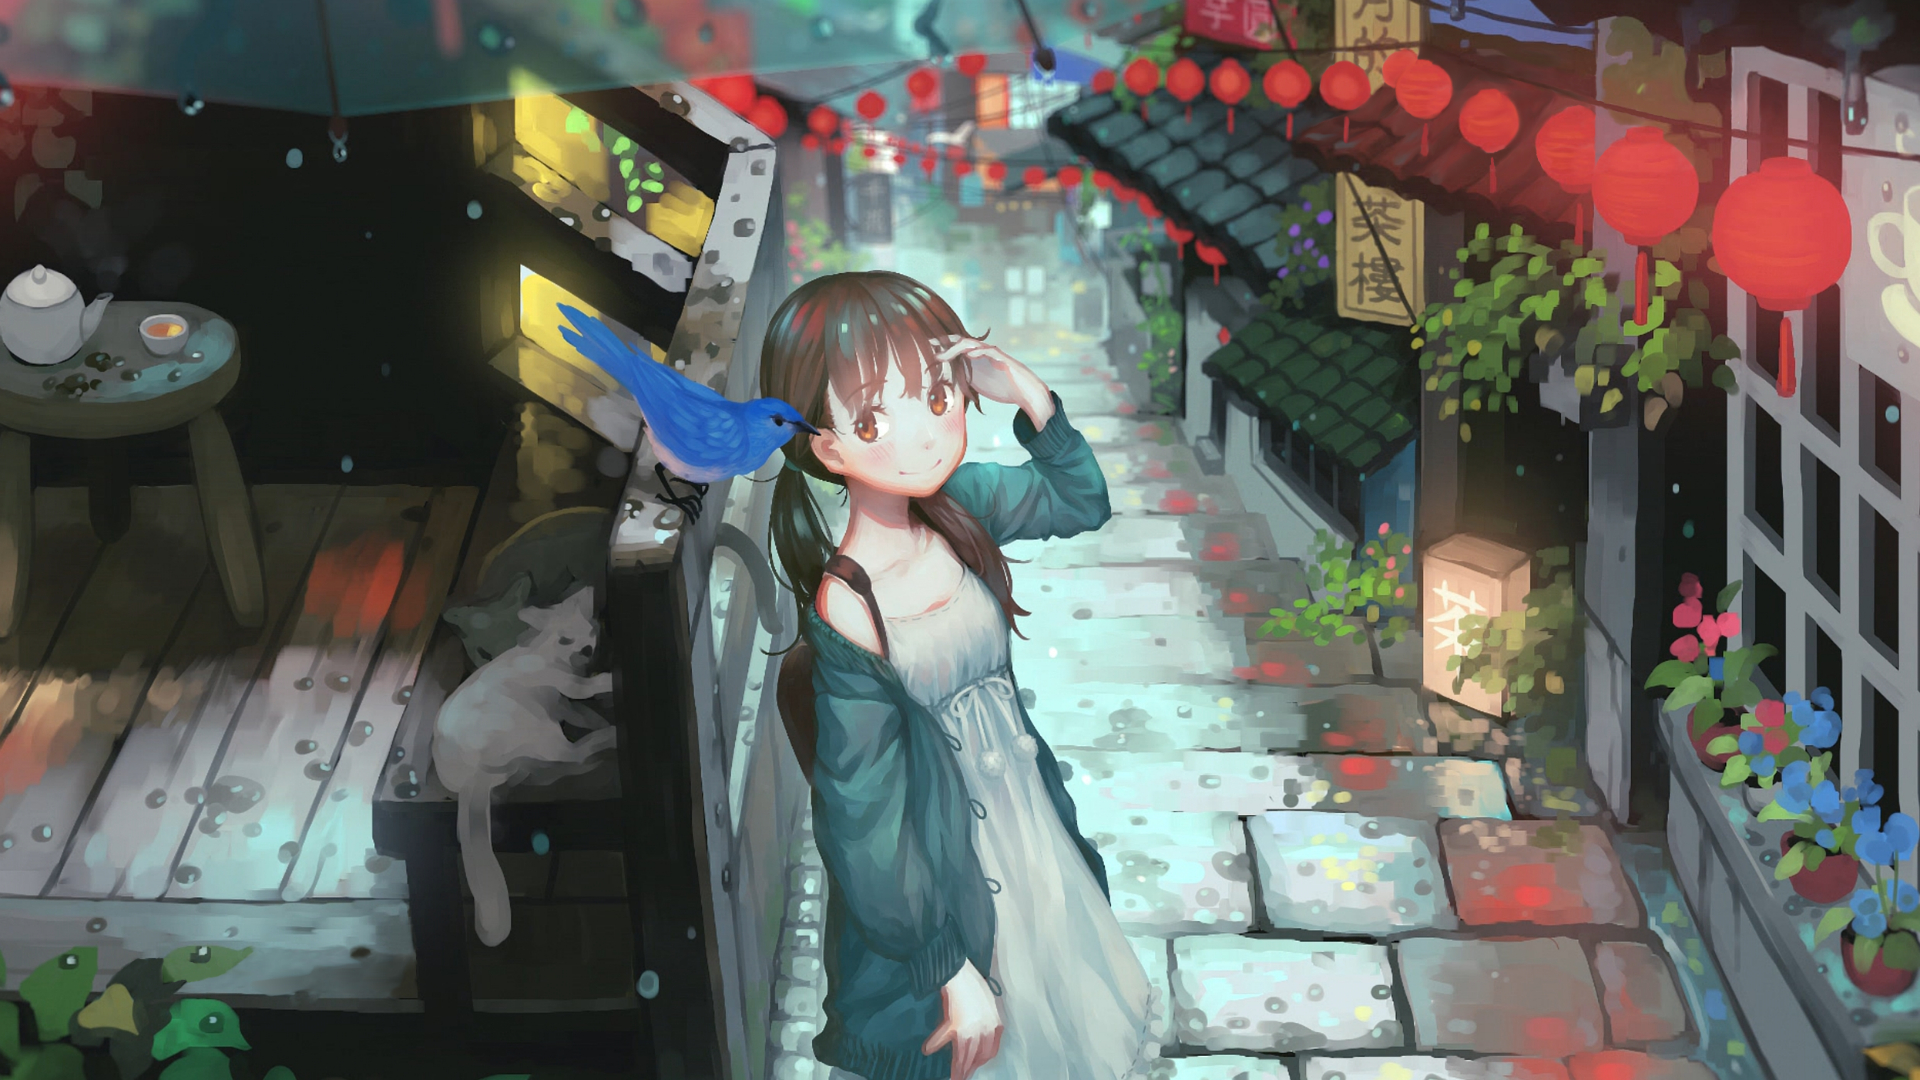

In [13]:
Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [14]:
ckpt = r'models/AnimeInstanceSegmentation/rtmdetl_e60.ckpt'

mask_thres = 0.3
instance_thres = 0.3
refine_kwargs = {'refine_method': 'refinenet_isnet'} # set to None if not using refinenet

In [15]:
net = AnimeInsSeg(ckpt, mask_thr=mask_thres, refine_kwargs=refine_kwargs)
instances: AnimeInstances = net.infer(
    img,
    output_type='numpy',
    pred_score_thr=instance_thres
)

[2024-01-04 10:01:28,922]WARNING:/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]



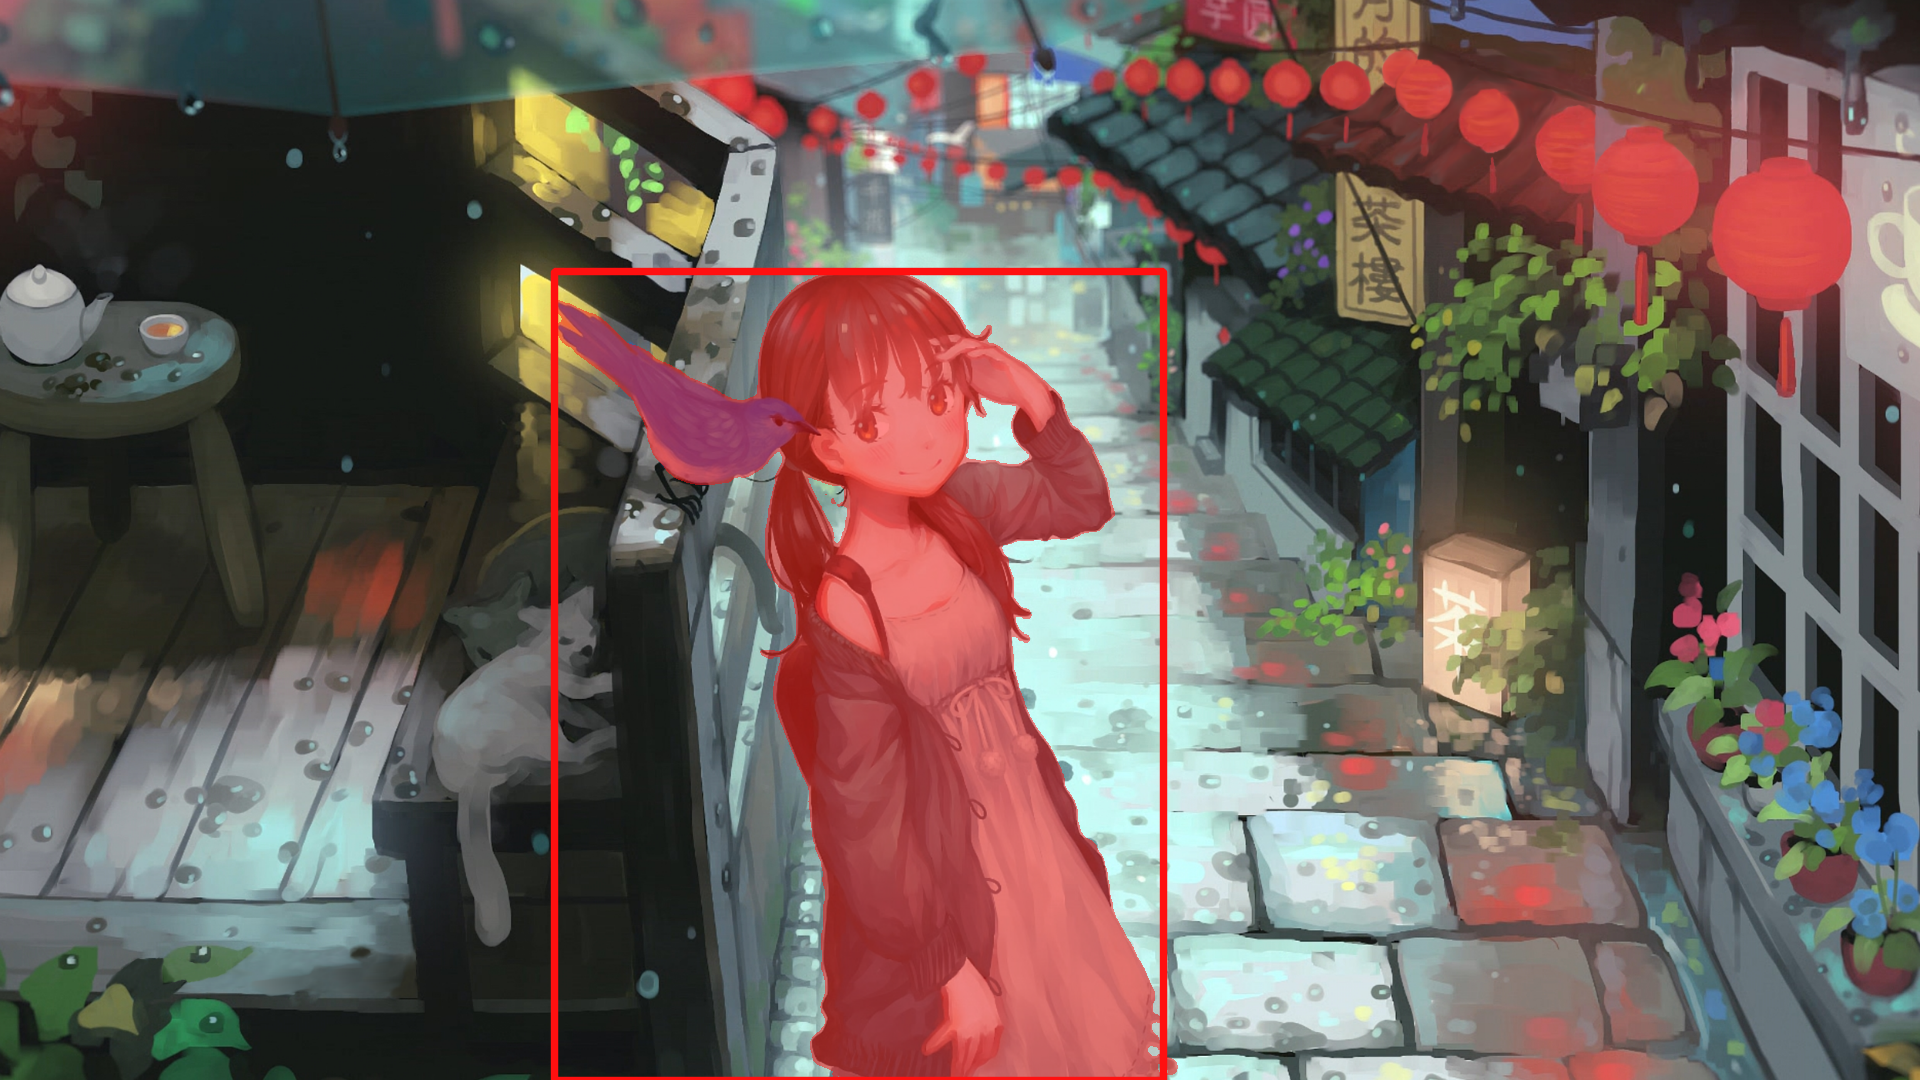

In [16]:
drawed = img.copy()
im_h, im_w = img.shape[:2]

# instances.bboxes, instances.masks will be None, None if no obj is detected

for ii, (xywh, mask) in enumerate(zip(instances.bboxes, instances.masks)):
    color = get_color(ii)

    mask_alpha = 0.5
    linewidth = max(round(sum(img.shape) / 2 * 0.003), 2)

    # draw bbox
    p1, p2 = (int(xywh[0]), int(xywh[1])), (int(xywh[2] + xywh[0]), int(xywh[3] + xywh[1]))
    cv2.rectangle(drawed, p1, p2, color, thickness=linewidth, lineType=cv2.LINE_AA)

    # draw mask
    p = mask.astype(np.float32)
    blend_mask = np.full((im_h, im_w, 3), color, dtype=np.float32)
    alpha_msk = (mask_alpha * p)[..., None]
    alpha_ori = 1 - alpha_msk
    drawed = drawed * alpha_ori + alpha_msk * blend_mask

drawed = drawed.astype(np.uint8)
Image.fromarray(drawed[..., ::-1])

In [17]:
kpipe = KenBurnsPipeline("configs/3dkenburns.yaml")
kcfg = kpipe.generate_kenburns_config(img)
npy_frame_list = kpipe.autozoom(kcfg)
npyframes2video(npy_frame_list, "output.mp4")

100%|██████████| 75/75 [00:07<00:00,  9.97it/s]


Moviepy - Building video output.mp4.
Moviepy - Writing video output.mp4



Moviepy - Done !
Moviepy - video ready output.mp4
